In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("C:\\Users\\Lucas\\Video Images\\Data\\NoNone_Compare_withdist.csv")

In [ ]:
df.head

In [41]:
df.head()

,Unnamed: 0.1,Unnamed: 0,imageFile,textFile,Step,Localization,Distance
0,151,151,GH010020@t=92.000.jpg,GH010020@t=92.000.txt,Surgery,upper_left/lower,0.113922
1,152,152,GH010020@t=92.067.jpg,GH010020@t=92.067.txt,Surgery,upper_left/lower,0.118056
2,153,153,GH010020@t=92.133.jpg,GH010020@t=92.133.txt,Surgery,upper_left/lower,0.116678
3,154,154,GH010020@t=92.200.jpg,GH010020@t=92.200.txt,Surgery,upper_left/lower,0.111443
4,155,155,GH010020@t=92.267.jpg,GH010020@t=92.267.txt,Surgery,upper_left/lower,0.109807


In [42]:
df["Distance"].describe()

count    1.880200e+04
mean     6.040180e-02
std      9.103647e-02
min      3.500000e-07
25%      1.397621e-02
50%      2.090777e-02
75%      4.982872e-02
max      6.826034e-01
Name: Distance, dtype: float64

In [ ]:
pd.qcut(df["Distance"], q=4)

array([[<AxesSubplot:title={'center':'Left'}>,
        <AxesSubplot:title={'center':'Posterior'}>],
       [<AxesSubplot:title={'center':'Right'}>,
        <AxesSubplot:title={'center':'Surgery'}>]], dtype=object)

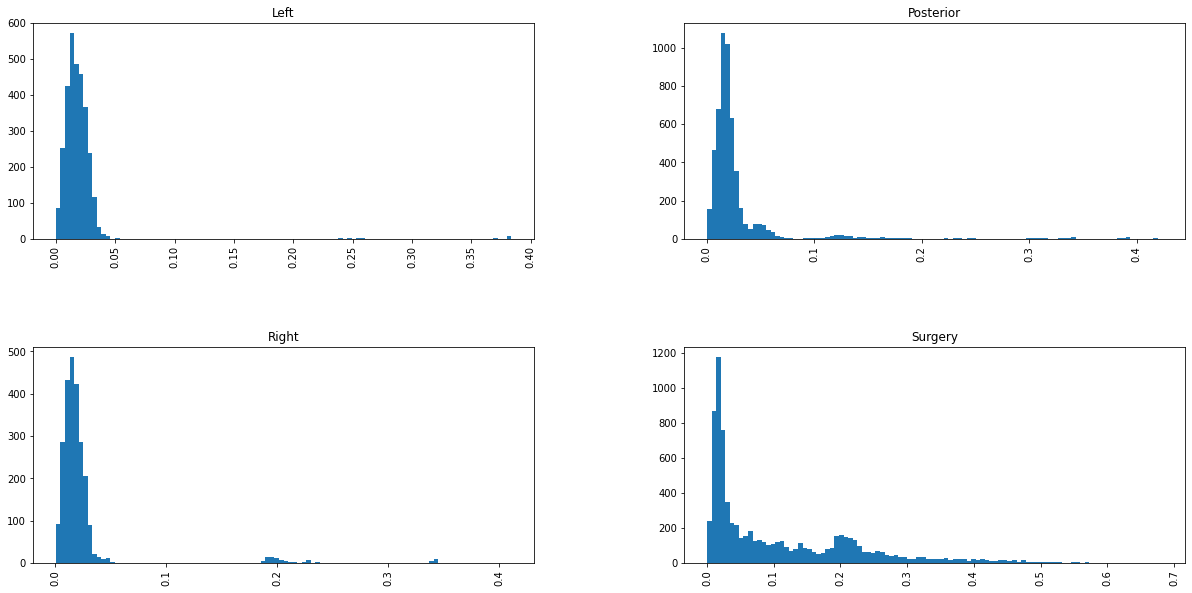

In [45]:
df.hist(column="Distance", by="Step", bins=100, figsize=(20, 10))

In [46]:
left = df[(df.Step == "Left")]
right = df[df.Step == "Right"]
post = df[df.Step == "Posterior"]
surg = df[df.Step == "Surgery"]

In [47]:
left["Distance"].describe()

count    3.089000e+03
mean     1.997066e-02
std      2.827976e-02
min      3.500000e-07
25%      1.155725e-02
50%      1.697878e-02
75%      2.342888e-02
max      3.836042e-01
Name: Distance, dtype: float64

In [48]:
right["Distance"].describe()

count    2449.000000
mean        0.024282
std         0.041557
min         0.000391
25%         0.010793
50%         0.016364
75%         0.022693
max         0.410619
Name: Distance, dtype: float64

In [49]:
post["Distance"].describe()

count    5341.000000
mean        0.031248
std         0.051756
min         0.000391
25%         0.013299
50%         0.018370
75%         0.025648
max         0.423942
Name: Distance, dtype: float64

In [50]:
surg["Distance"].describe()

count    7.923000e+03
mean     1.069825e-01
std      1.150387e-01
min      5.024938e-07
25%      1.873198e-02
50%      5.323243e-02
75%      1.865853e-01
max      6.826034e-01
Name: Distance, dtype: float64

In [51]:
df.loc[(df["Step"] == "Left") | (df["Step"] == "Right") | (df["Step"] == "Posterior"), 'Contact'] = 1
df.loc[(df["Step"] == "Surgery"), 'Contact'] = 0

In [112]:
df.head()

,Unnamed: 0.1,Unnamed: 0,imageFile,textFile,Step,Localization,Distance,Contact,Prediction,Cls,Surgery,Left,Right,Posterior
0,151,151,GH010020@t=92.000.jpg,GH010020@t=92.000.txt,Surgery,upper_left/lower,0.113922,0.0,0,0.0,1,0,0,0
1,152,152,GH010020@t=92.067.jpg,GH010020@t=92.067.txt,Surgery,upper_left/lower,0.118056,0.0,0,0.0,1,0,0,0
2,153,153,GH010020@t=92.133.jpg,GH010020@t=92.133.txt,Surgery,upper_left/lower,0.116678,0.0,0,0.0,1,0,0,0
3,154,154,GH010020@t=92.200.jpg,GH010020@t=92.200.txt,Surgery,upper_left/lower,0.111443,0.0,0,0.0,1,0,0,0
4,155,155,GH010020@t=92.267.jpg,GH010020@t=92.267.txt,Surgery,upper_left/lower,0.109807,0.0,0,0.0,1,0,0,0


In [54]:
df['Prediction'] = df['Distance'].apply(lambda x: 1 if x < 0.05 else 0)

In [ ]:
df.head(50)

In [56]:
df["Contact"].describe()

count    18802.000000
mean         0.578609
std          0.493795
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Contact, dtype: float64

In [57]:
df["Prediction"].describe()

count    18802.000000
mean         0.750239
std          0.432886
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Prediction, dtype: float64

In [68]:
df['Surgery'] = df['Step'].apply(lambda x: 1 if x == "Surgery" else 0)
df['Left'] = df['Step'].apply(lambda x: 1 if x == "Left" else 0)
df['Right'] = df['Step'].apply(lambda x: 1 if x == "Right" else 0)
df['Posterior'] = df['Step'].apply(lambda x: 1 if x == "Posterior" else 0)

In [ ]:
df.drop(columns=['Cls'])

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [89]:
#define the predictor variables and the response variable
X = df[['Distance']]
y = df['Contact']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression(class_weight='balanced')

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

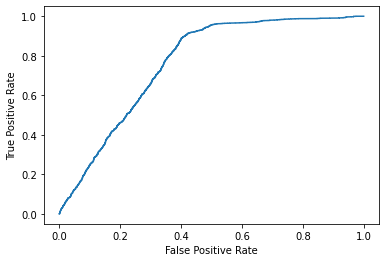

In [113]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
y_pred = log_regression.predict(X_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
print("optimal threshold: " + str(thresholds[np.argmax(tpr - fpr)]))

optimal threshold: 0.5623449494917063


f1 score: 0.8234513861254807
accuracy score: 0.764048927495125


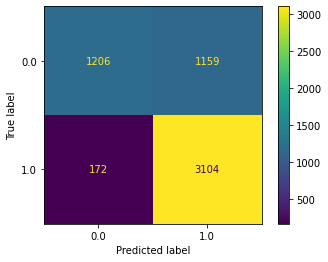

In [129]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
print("f1 score: " + str(metrics.f1_score(y_test, y_pred)))
print("accuracy score: " + str(metrics.accuracy_score(y_test, y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_regression.classes_)
disp.plot()
plt.show()

f1 score: 0.8179106916697308
precision score: 0.7361376673040153
recall score: 0.9201213346814965


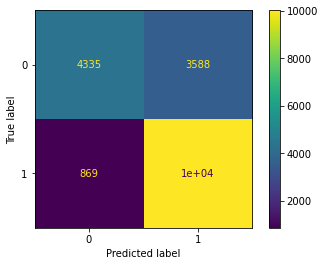

In [127]:
thr = 0.04
df['thrTest'] = df['Distance'].apply(lambda x: 1 if x <= thr else 0)
print("f1 score: " + str(metrics.f1_score(df['Contact'], df['thrTest'])))
print("precision score: " + str(metrics.precision_score(df['Contact'], df['thrTest'])))
print("recall score: " + str(metrics.recall_score(df['Contact'], df['thrTest'])))
cm2 = sklearn.metrics.confusion_matrix(df['Contact'], df['thrTest'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

optimal: 0.06
f1 score: 0.8183324130314744
precision score: 0.7166839378238342
recall score: 0.9535802923062782


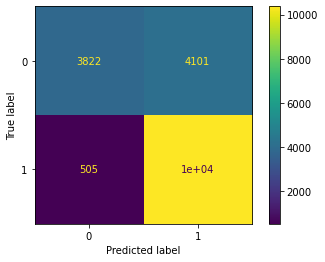

In [145]:
optimal = 0
best = -1
for thr in range(0, 100):
    thr *= 0.01
    if thr == 0:
        continue
    df['thrTest'] = df['Distance'].apply(lambda x: 1 if x <= thr else 0)
    f1 = metrics.f1_score(df['Contact'], df['thrTest'])
    if f1 >= best:
        optimal = thr
        best = f1
print("optimal: " + str(optimal))
df['thrTest'] = df['Distance'].apply(lambda x: 1 if x <= optimal else 0)
print("f1 score: " + str(metrics.f1_score(df['Contact'], df['thrTest'])))
print("precision score: " + str(metrics.precision_score(df['Contact'], df['thrTest'])))
print("recall score: " + str(metrics.recall_score(df['Contact'], df['thrTest'])))
cm2 = sklearn.metrics.confusion_matrix(df['Contact'], df['thrTest'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

In [141]:
df.head()

,Unnamed: 0.1,Unnamed: 0,imageFile,textFile,Step,Localization,Distance,Contact,Prediction,Cls,Surgery,Left,Right,Posterior,thrTest
0,151,151,GH010020@t=92.000.jpg,GH010020@t=92.000.txt,Surgery,upper_left/lower,0.113922,0.0,0,0.0,1,0,0,0,1
1,152,152,GH010020@t=92.067.jpg,GH010020@t=92.067.txt,Surgery,upper_left/lower,0.118056,0.0,0,0.0,1,0,0,0,1
2,153,153,GH010020@t=92.133.jpg,GH010020@t=92.133.txt,Surgery,upper_left/lower,0.116678,0.0,0,0.0,1,0,0,0,1
3,154,154,GH010020@t=92.200.jpg,GH010020@t=92.200.txt,Surgery,upper_left/lower,0.111443,0.0,0,0.0,1,0,0,0,1
4,155,155,GH010020@t=92.267.jpg,GH010020@t=92.267.txt,Surgery,upper_left/lower,0.109807,0.0,0,0.0,1,0,0,0,1
